In my previous post, I explained the importance of feature encoding and how to do it in python using scikit-learn. In this post, we are going to talk about another component of the preprocessing step in applying machine learning models which is feature scaling. Very rarely would you be dealing with features that share the same scale. What do I mean by that? For example, let's look at the famous wine dataset which can be found here (https://archive.ics.uci.edu/ml/datasets/wine). This dataset contains several features such as alcohol content, malic acid and color intensity which describe a type of wine. Focusing on just these three features, we can see that they do not share same scale. Alcohol content is measured in alcohol/volume where as malic acid is measured in g/l. 

If we were to leave the features as they are and feed them to a machine learning algorithm, we may get incorrect predictions. This is because most algorithms such as SVM, K-nearest neighbors, and logistic regression features to be scaled. If the features are not scaled, your machine learning algorithm might assign increased weight to one feature compared to another solely based on its value. 

There are two ways we can transform our features so that they share the same scale: standardization and min-max scaling. Standardization assumes that your features are normally distributed and transforms them so that mean=0 and standard deviation = 1. In contrast, min-max scaling (also known as normalization) transforms the features so that they lie between 0 and 1. 

In this post, I will show you how to scale your features using scikit-learn. 

In [2]:
# First, let's load a portion of wine data set (columns 1, 2, and 9)
import pandas as pd
import numpy as np
%matplotlib inline

dataset = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None,
                      usecols=[1,2,9])

dataset.columns=['Alcohol', 'Malic acid', 'Color Intensity']

dataset.head()

,Alcohol,Malic acid,Color Intensity
0,14.23,1.71,2.29
1,13.20,1.78,1.28
2,13.16,2.36,2.81
3,14.37,1.95,2.18
4,13.24,2.59,1.82


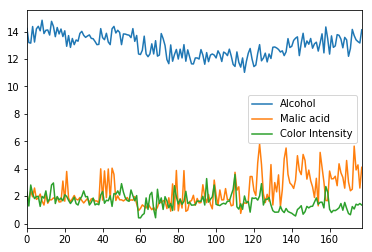

In [3]:
# Let's plot our features to visualize their scale.
dataset.plot();

As we can see, each feature has its own scale. 

Let's apply standardization and min-max scaling to these features.

# Standardization

In [4]:
# For both types of scaling, we need to import preprocessing module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_standard_scaled = scaler.fit(dataset)
dataset_standard_scaled = dataset_standard_scaled.transform(dataset)

This is what the first few rows of scaled dataset look like:

In [5]:
dataset_standard_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  1.22488398],
       [ 0.24628963, -0.49941338, -0.54472099],
       [ 0.19687903,  0.02123125,  2.13596773],
       [ 1.69154964, -0.34681064,  1.03215473],
       [ 0.29570023,  0.22769377,  0.40140444]])

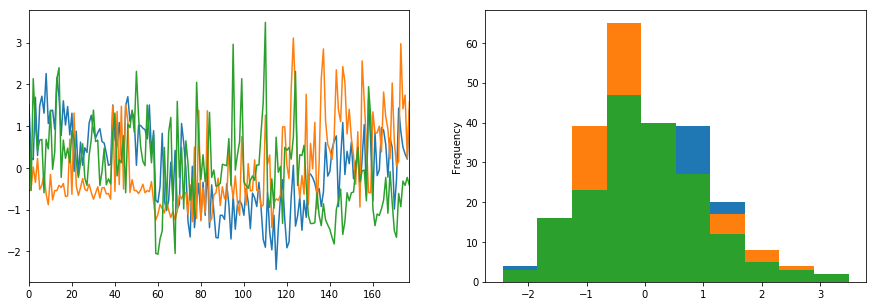

In [6]:
# Let's visualize our scaled features (left) and their distribution (right)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)

pd.DataFrame(dataset_standard_scaled).plot(kind='line', legend=False, ax=axs[0], figsize=(15, 5))
pd.DataFrame(dataset_standard_scaled).plot(kind='hist', legend=False, ax=axs[1]);

As you can see, the new dataset has mean of 0 and standard deviation of 1.

In [7]:
print('mean = ' + str(abs(dataset_standard_scaled.mean().round())) + ' std = ' + str(abs(dataset_standard_scaled.std().round())))

mean = 0.0 std = 1.0


Applying min-max scaling is very similar to applying standardization. Here is how you can do it!

# Min-Max Scaling

In [8]:
# For both types of scaling, we need to import preprocessing module
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_min_max_scaled = scaler.fit(dataset)
dataset_min_max_scaled = dataset_min_max_scaled.transform(dataset)

This is what the first few rows of scaled dataset look like:

In [9]:
dataset_min_max_scaled[:5]

array([[ 0.84210526,  0.1916996 ,  0.59305994],
       [ 0.57105263,  0.2055336 ,  0.27444795],
       [ 0.56052632,  0.3201581 ,  0.75709779],
       [ 0.87894737,  0.23913043,  0.55835962],
       [ 0.58157895,  0.36561265,  0.44479495]])

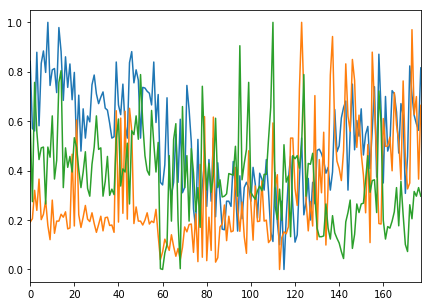

In [10]:
# Let's visualize our scaled features
pd.DataFrame(dataset_min_max_scaled).plot(legend=False, figsize=(7, 5));

As you can see, the new dataset has a min of 0 and a max of 1.

In [11]:
print('min = ' + str(np.min(dataset_min_max_scaled)) + ' max = ' + str(np.max(dataset_min_max_scaled)))

min = 0.0 max = 1.0
